In [26]:
import faiss
import numpy as np

from datasets import load_dataset

from tqdm import tqdm

from pprint import pprint

import matplotlib.pyplot as plt

from utilities import *

import gc

In [27]:
# def intersection(a, b):
#     a = a[0]
#     b = b[0]
#     return np.intersect1d(a, b)

# def union(a, b):
#     a = a[0]
#     b = b[0]
#     return np.union1d(a, b)

# def jacard_similarity(a, b):
#     return len(intersection(a, b)) / len(union(a, b))

def sample(arr, n):
    choice = np.random.choice(len(arr), n, replace=False)
    return choice

In [28]:
bert_index = faiss.read_index("../GeneratingEmbeddings/Indexes/bert_mini_embeddings.index") # 256
bert_mini_index = faiss.read_index("../GeneratingEmbeddings/Indexes/bert_tiny_embeddings.index") # 128

In [36]:
def load_base_embeddings():
    e_list = []
    for i in range(1, 19):
        embeddings = np.load(f'../GeneratingEmbeddings/bert_mini_embeddings/embeddings_{i}000.npz')['arr_0'].reshape(-1, 256)
        e_list.append(embeddings)
    
    e = np.concatenate(e_list, axis=0)
    return e

def load_tiny_embeddings():
    e_list = []
    for i in range(1, 19):
        embeddings = np.load(f'../GeneratingEmbeddings/bert_tiny_embeddings/embeddings_{i}000.npz')['arr_0'].reshape(-1, 128)
        e_list.append(embeddings)
    
    e = np.concatenate(e_list, axis=0)
    return e


base_embeddings = load_base_embeddings()
tiny_embeddings = load_tiny_embeddings()

In [39]:
jacc = []

n = 1000
choice = sample(tiny_embeddings, n)
sampled_base = base_embeddings[choice]
sampled_tiny = tiny_embeddings[choice]

for i in tqdm(range(n)):
    _, I_Base = bert_index.search(sampled_base[i:i+1], 1000)
    _, I_Tiny = bert_mini_index.search(sampled_tiny[i:i+1], 1000)
    jacc.append(jaccard(I_Base, I_Tiny))

  2%|▏         | 20/1000 [00:03<03:00,  5.43it/s]


KeyboardInterrupt: 

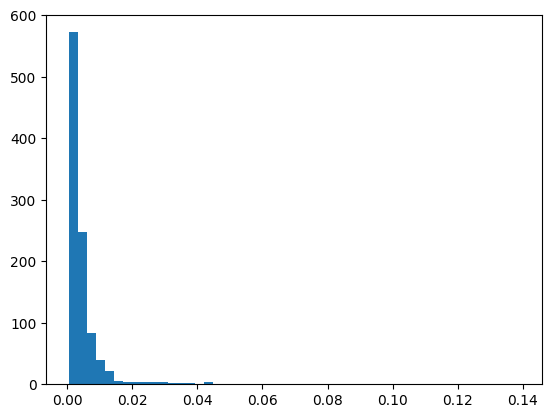

In [12]:
plt.hist(jacc, bins=50)
plt.show()